# Impact of Feature Scaling in Machine Learning Algorithms

This document serves as the Supplementary Material for the article Impact of Feature Scaling in Machine Learning Algorithms. Because the final results comprise over 50 tables, we have consolidated them here for clarity and ease of reference. You will find the complete outcomes for each dataset—detailing the scaling methods applied, the machine learning algorithms evaluated, performance metrics, and both training and inference times. All analyses were performed using Python, and the raw CSV files are available in the repository for convenient spreadsheet–based review.

## Loading the data and libraries

In [1]:
import pandas as pd
import dataframe_image as dfi

df_regression = pd.read_csv('results_regression.csv')
df_classification = pd.read_csv('results_classification.csv')
df_regression['scaling_name'] = df_regression['scaling_name'].fillna('None')
df_classification['scaling_name'] = df_classification['scaling_name'].fillna('None')

Here’s a clear mapping of scaling abbreviations to their full names, optimized for plots/tables in your paper:

In [2]:
scaling_abbrev = {
    'MinMaxScaler': 'MM',
    'MaxAbsScaler': 'MA',
    'StandardScaler': 'SS',
    'ParetoScaling': 'PS',
    'StandardStabilityScaling': 'SSS',
    'MeanCentered': 'MC',
    'None': 'NO',
    'RobustScaler': 'RS',
    'QuantileTransformer': 'QT',
    'DecimalScaling': 'DS',
    'TanhTransformer': 'TT',
    'LogisticSigmoidTransformer': 'LS',
    'HyperbolicTangentTransformer': 'HT'
}

In [3]:
# mapping the abbreviations
df_classification['scaling_abbrev'] = df_classification['scaling_name'].replace(scaling_abbrev)
df_regression['scaling_abbrev'] = df_regression['scaling_name'].replace(scaling_abbrev)

In [15]:
df_class_analysis = df_classification['dataset_name'].unique()

for dataset in df_class_analysis:
    df_filtered_class = df_classification[df_classification['dataset_name'] == dataset]
    
    # Create the table with models (rows) and scalers (columns)
    heat_df = df_filtered_class.groupby(['model', 'scaling_abbrev'])['accuracy'].mean().unstack()
    
    # Function to apply bold formatting to the maximum values in each row
    def bold_max(s):
        is_max = s == s.max()
        return ['font-weight: bold' if v else '' for v in is_max]
    
    # Apply conditional styling and format values to four decimal places
    styled_table = (
        heat_df.style
        .apply(bold_max, axis=1)
        .format("{:.4f}")
        .set_caption(
            f"Table: Experimental Results for the '{dataset}' Dataset — Mean Accuracy by Model and Scaling Method"
        )
    )
    heat_df.index.name = None
    heat_df.columns.name = None
    
    # Display the dataset title and the styled table
    display(styled_table)

In [ ]:
df_class_analysis = df_classification['dataset_name'].unique()

for dataset in df_class_analysis:
    df_filtered_class = df_classification[df_classification['dataset_name'] == dataset]
    
    # Criar a tabela pivô com modelos (linhas) e scalers (colunas)
    heat_df = df_filtered_class.groupby(['model', 'scaling_abbrev'])['accuracy'].mean().unstack()
    
    # Função para aplicar negrito nos máximos de cada linha
    def bold_max(s):
        is_max = s == s.max()
        return ['font-weight: bold' if v else '' for v in is_max]
    
    # Aplicar o estilo condicional e formatar valores para 2 casas decimais
    styled_table = (
        heat_df.style
        .apply(bold_max, axis=1)
        .format("{:.4f}")  # Opcional: formata os números
    )
    heat_df.index.name = None
    heat_df.columns.name = None
    styled_table = heat_df.style.apply(bold_max, axis=1).format("{:.4f}")
    
    # Exibir a tabela com título
    display(styled_table)

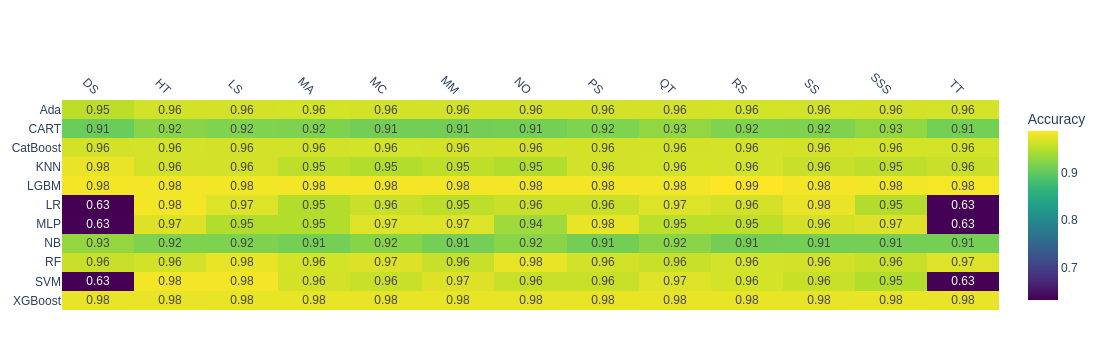

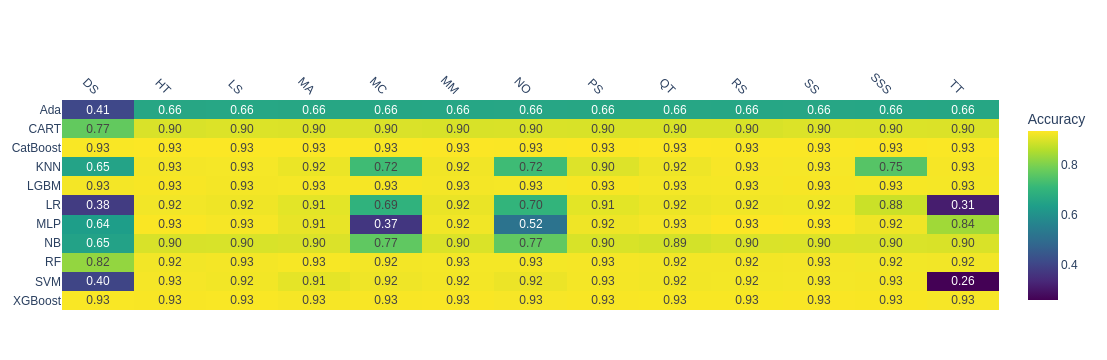

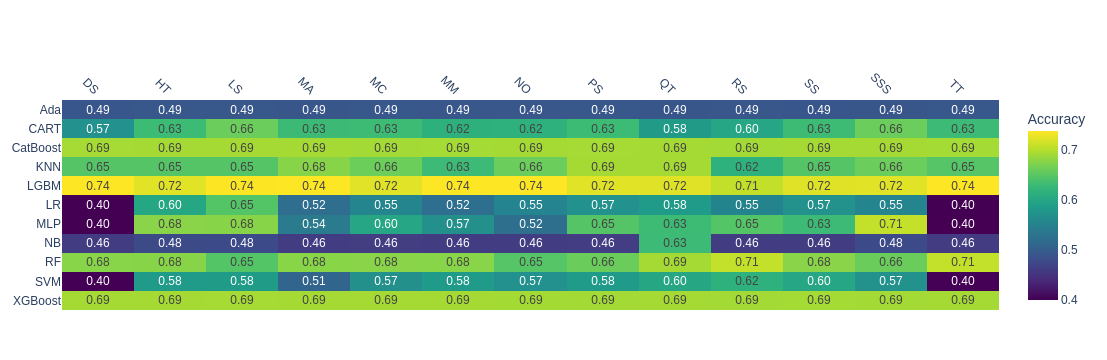

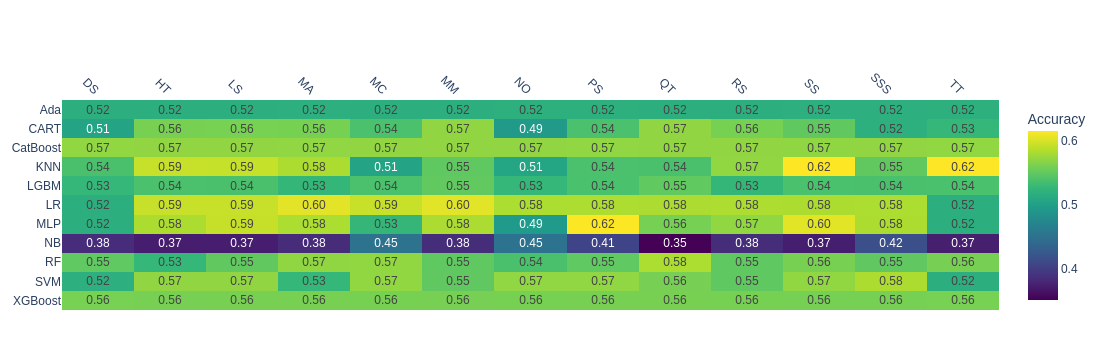

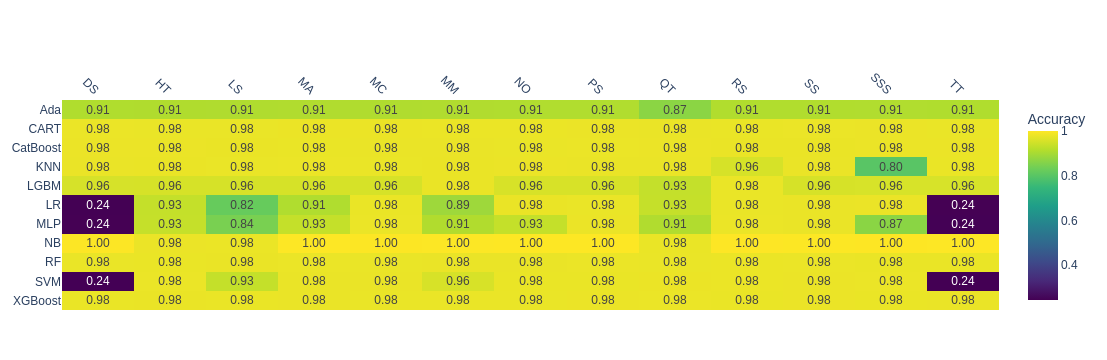

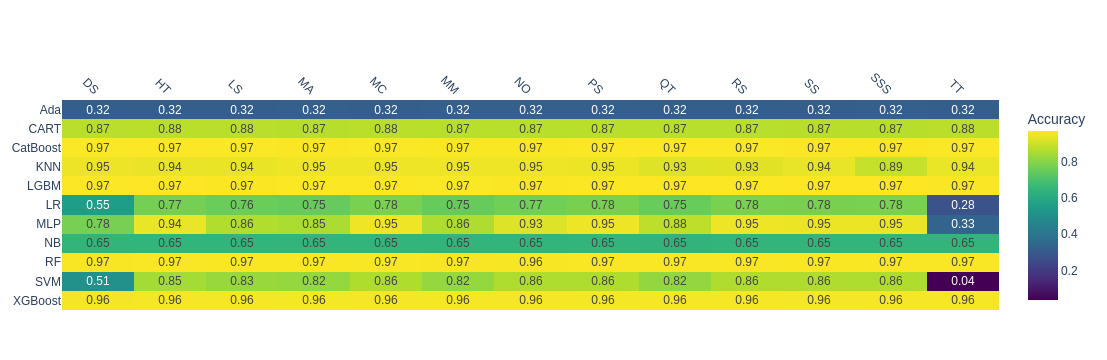

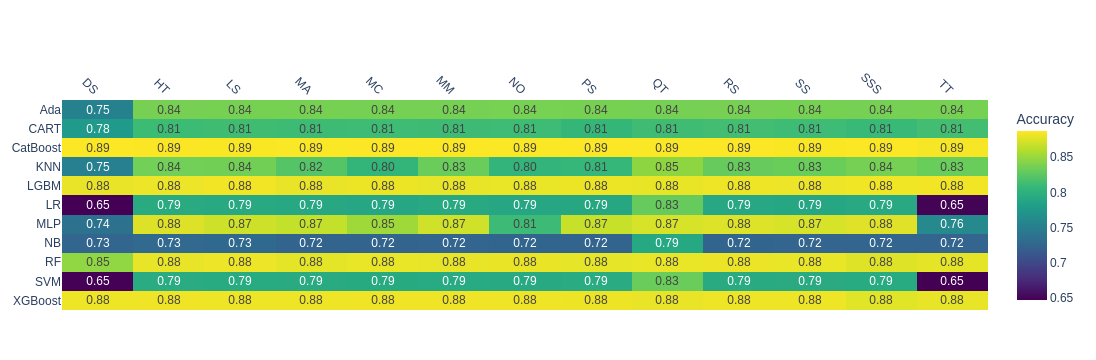

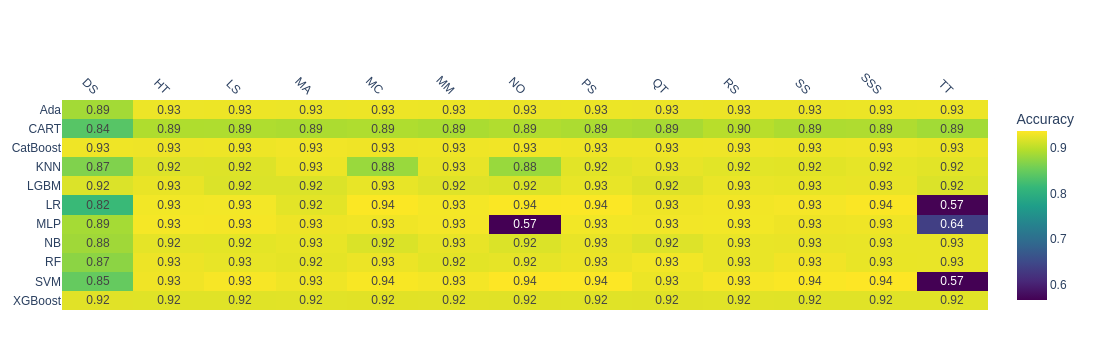

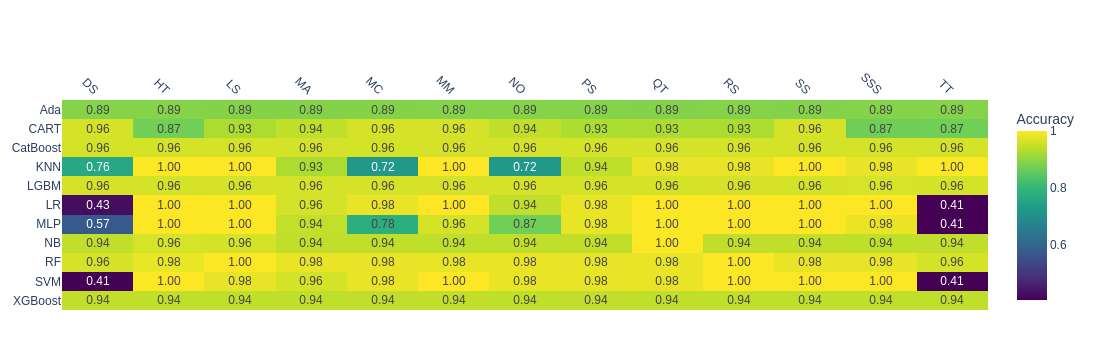

In [7]:
import plotly.express as px

df_class_analysis = df_classification['dataset_name'].unique()

for dataset in df_class_analysis:
    df_filtered_class = df_classification[df_classification['dataset_name'] == dataset]

    # Pivot to create a matrix: rows = models, columns = scalers, values = mean accuracy
    heat_df = df_filtered_class.groupby(['model', 'scaling_abbrev'])['accuracy'].mean().unstack()

    fig = px.imshow(heat_df,
                    text_auto=".2f",
                    aspect="auto",
                    labels=dict(x="", y="", color="Accuracy"),
                    color_continuous_scale='Viridis',
                    title=f'')

    # Accuracy Heatmap per Scaler and Model - {dataset}
    fig.update_xaxes(side="top", tickangle=45)
    fig.update_layout(margin=dict(t=100, l=50, r=50, b=50))
    fig.show()


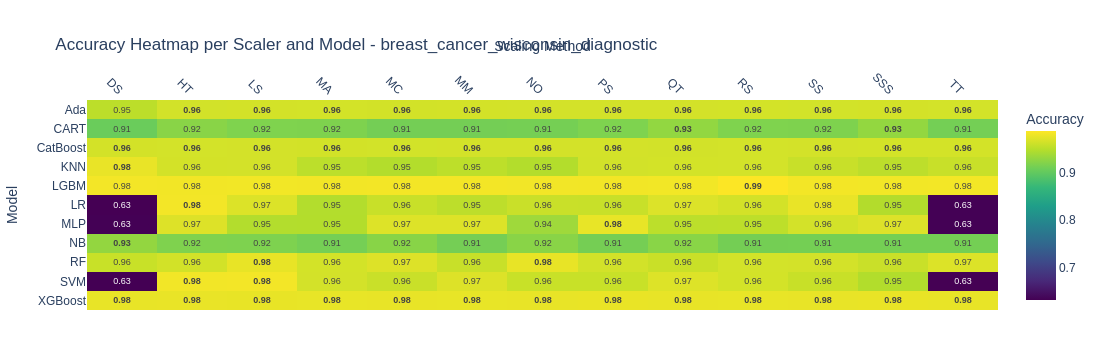

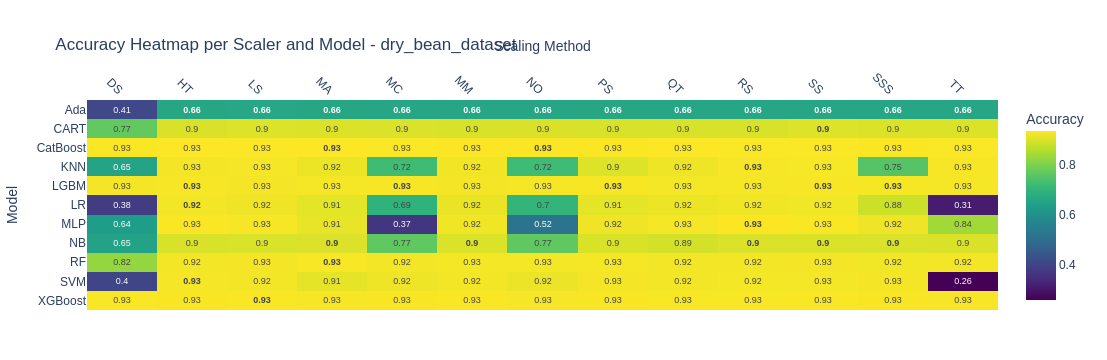

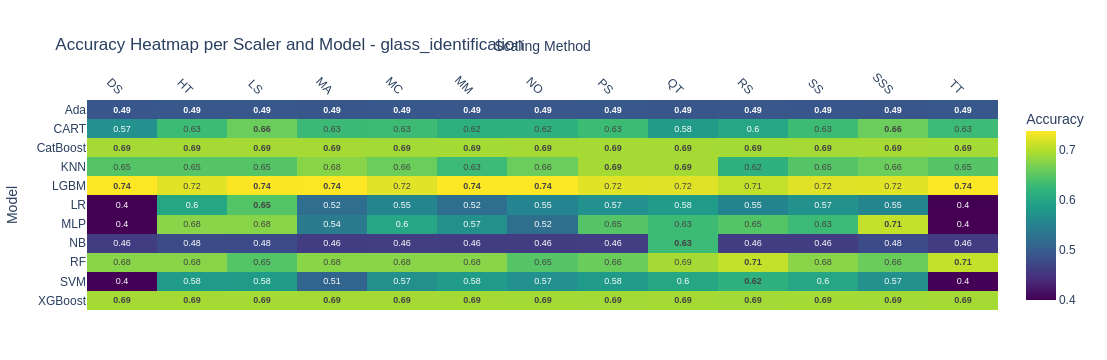

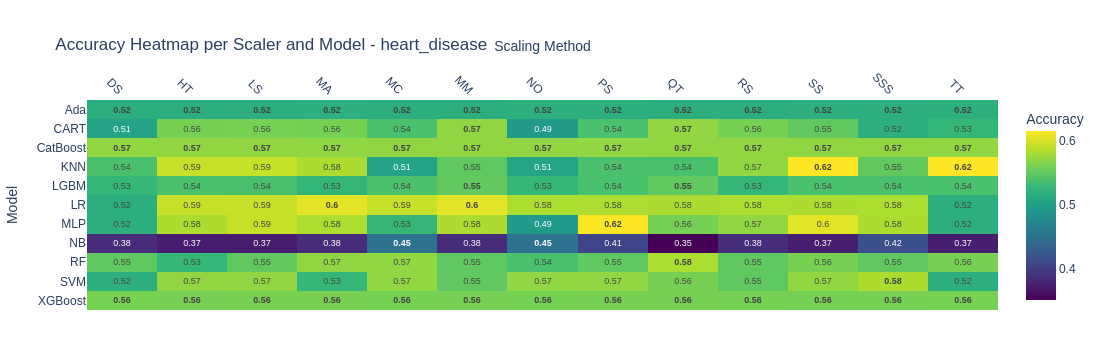

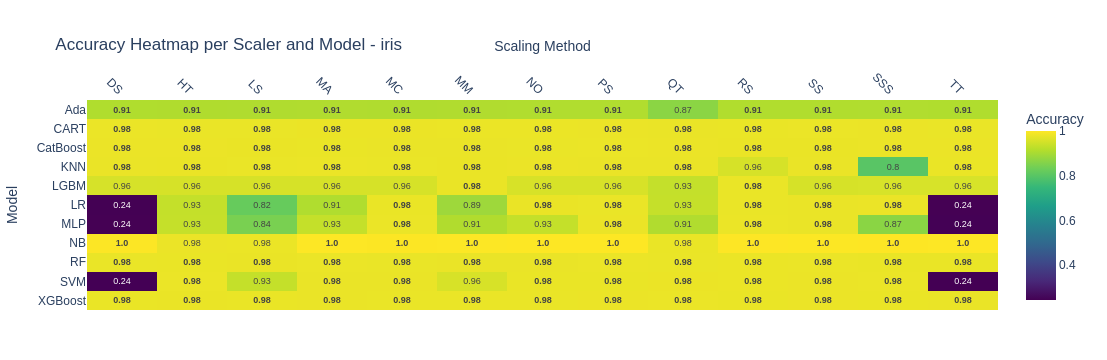

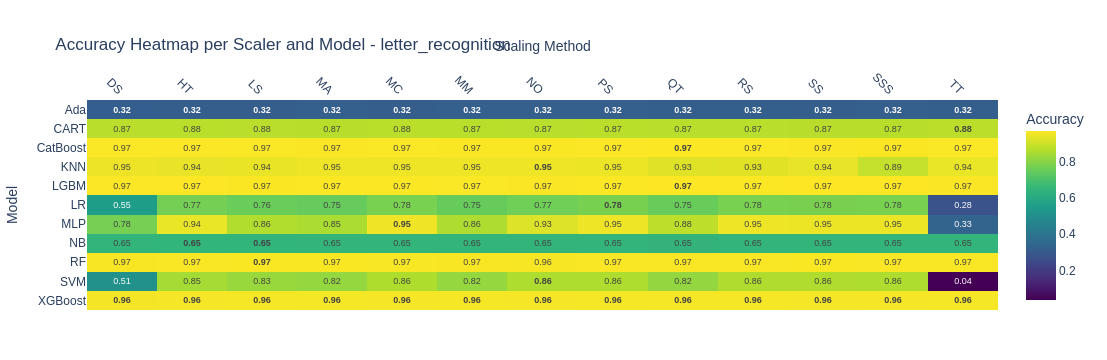

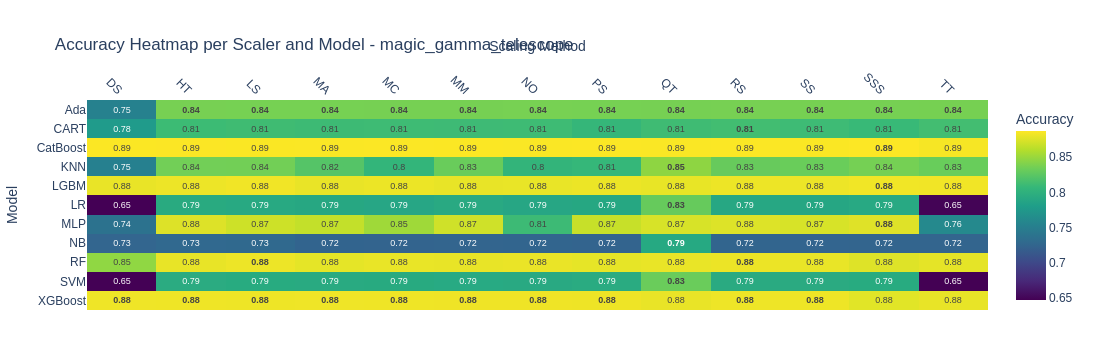

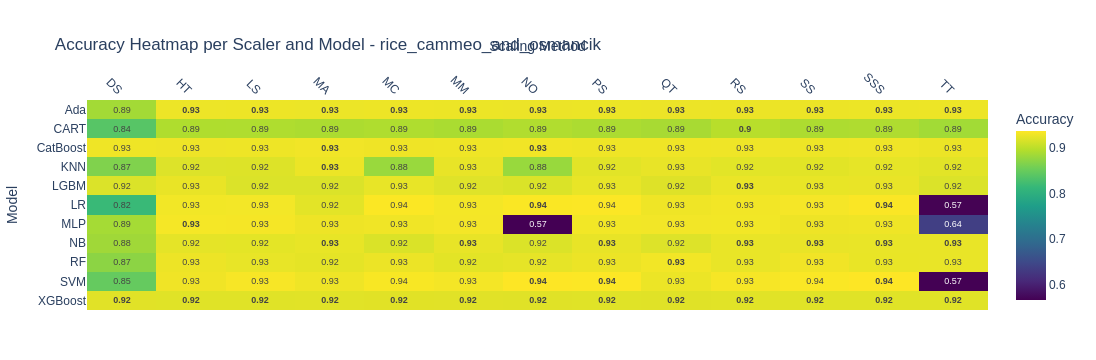

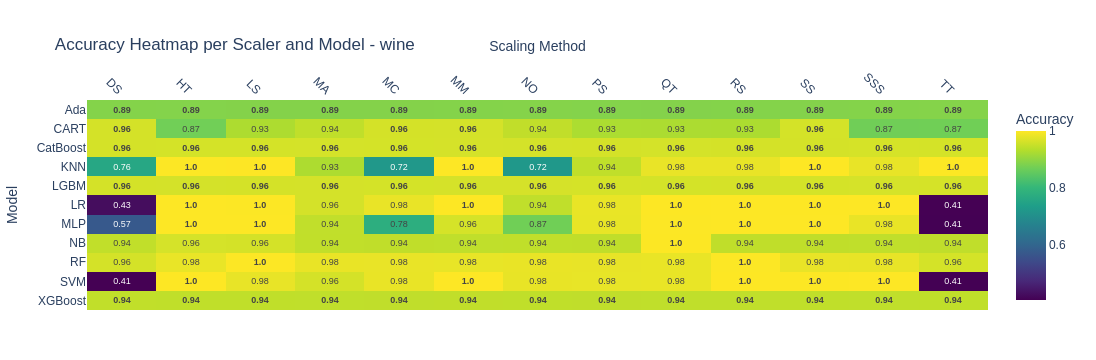

In [18]:
import numpy as np
df_class_analysis = df_classification['dataset_name'].unique()

for dataset in df_class_analysis:
    df_filtered_class = df_classification[df_classification['dataset_name'] == dataset]

    # Pivot to create a matrix: rows = models, columns = scalers, values = mean accuracy
    heat_df = df_filtered_class.groupby(['model', 'scaling_abbrev'])['accuracy'].mean().unstack()

    # Find the max value in each row (model)
    max_values = heat_df.max(axis=1)
    
    # Create a mask for max values (used for text formatting)
    is_max = heat_df.eq(max_values, axis=0)

    # Custom text template: show all values, but bold the max values
    text = np.where(is_max, 
                   "<b>" + heat_df.round(2).astype(str) + "</b>", 
                   heat_df.round(2).astype(str))

    fig = px.imshow(heat_df,
                    text_auto=False,  # Disable default text to use custom text
                    aspect="auto",
                    labels=dict(x="Scaling Method", y="Model", color="Accuracy"),
                    color_continuous_scale='Viridis',
                    title=f'Accuracy Heatmap per Scaler and Model - {dataset}')

    # Add custom text with max values bolded
    fig.update_traces(text=text, texttemplate="%{text}")

    # Adjust layout
    fig.update_xaxes(side="top", tickangle=45)
    fig.update_layout(margin=dict(t=100, l=50, r=50, b=50))
    fig.show()

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Your original code
df_class_analysis = df_classification['dataset_name'].unique()

for dataset in df_class_analysis:
    df_filtered_class = df_classification[df_classification['dataset_name'] == dataset]
    
    heat_df = df_filtered_class.groupby(['model', 'scaling_abbrev'])['accuracy'].mean().unstack()
    
    def bold_max(s):
        is_max = s == s.max()
        return ['font-weight: bold' if v else '' for v in is_max]
    
    styled_table = (
        heat_df.style
        .apply(bold_max, axis=1)
        .format("{:.4f}")
    )
    
    heat_df.index.name = None
    
    # --- NEW PART: Saving as PNG ---
    fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size as needed
    ax.axis('off')  # Hide axes

    # Draw the table
    table = ax.table(
        cellText=heat_df.round(4).values,
        rowLabels=heat_df.index,
        colLabels=heat_df.columns,
        cellLoc='center',
        loc='center'
    )
    
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)  # Adjust scaling if needed

    # Save the figure
    plt.savefig(f"{dataset}_classification_table.png", bbox_inches='tight', dpi=300)
    plt.close()


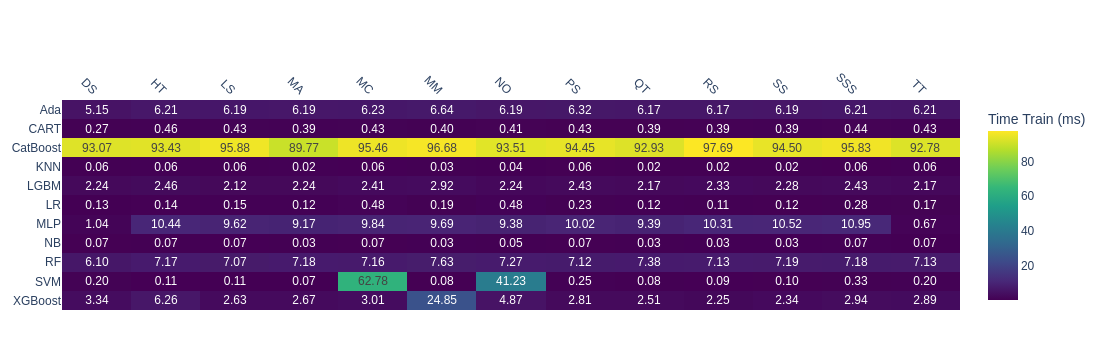

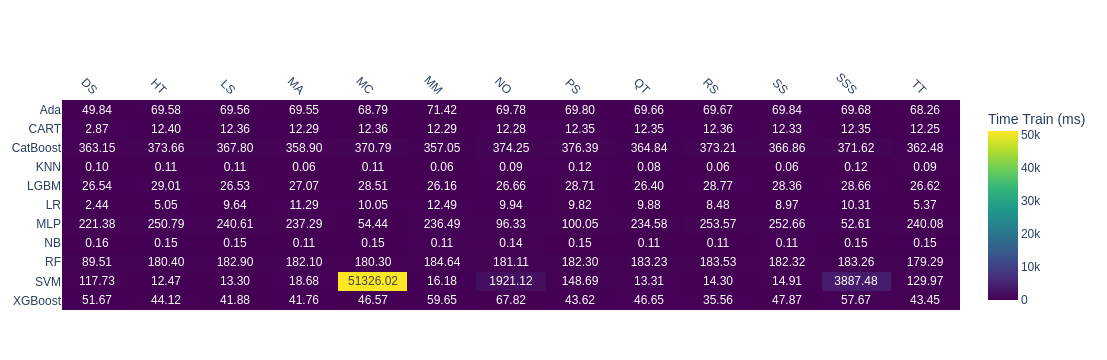

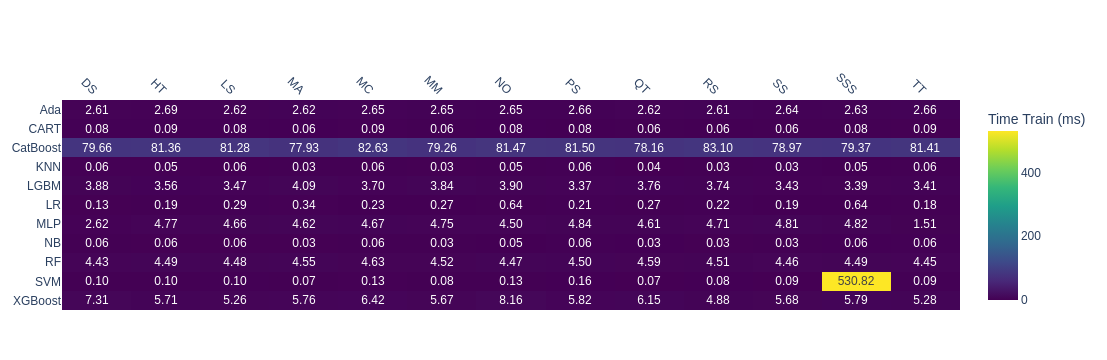

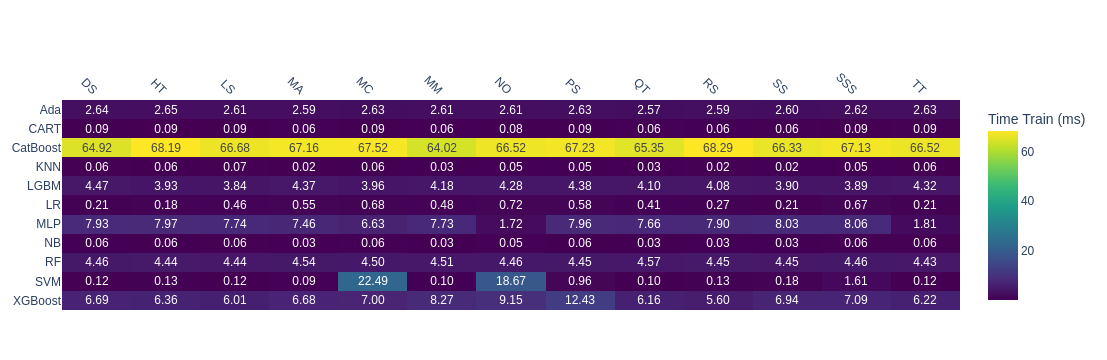

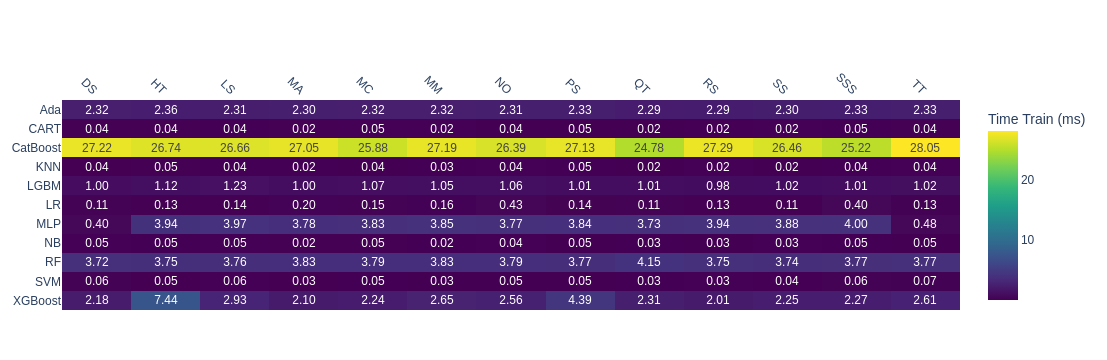

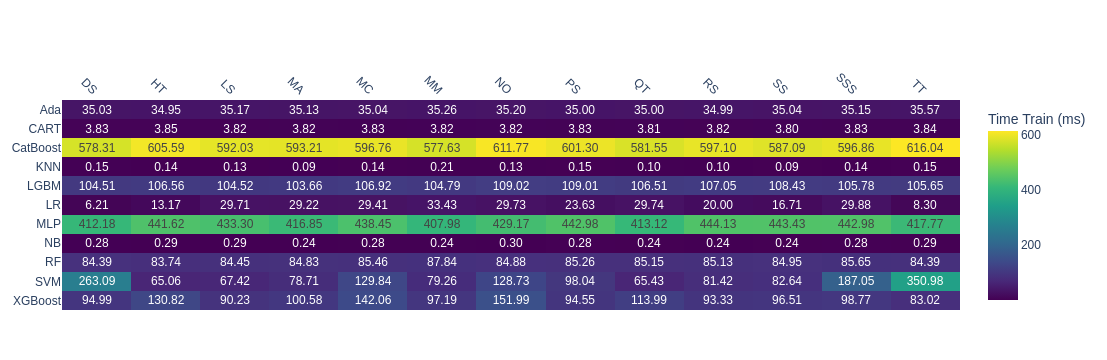

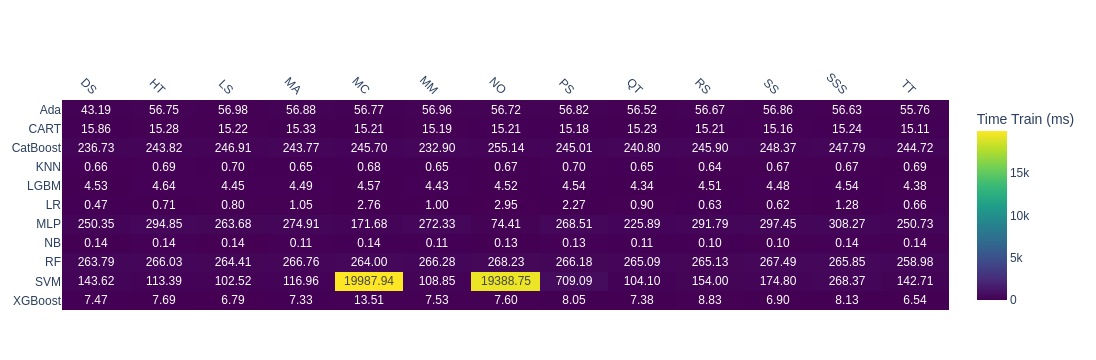

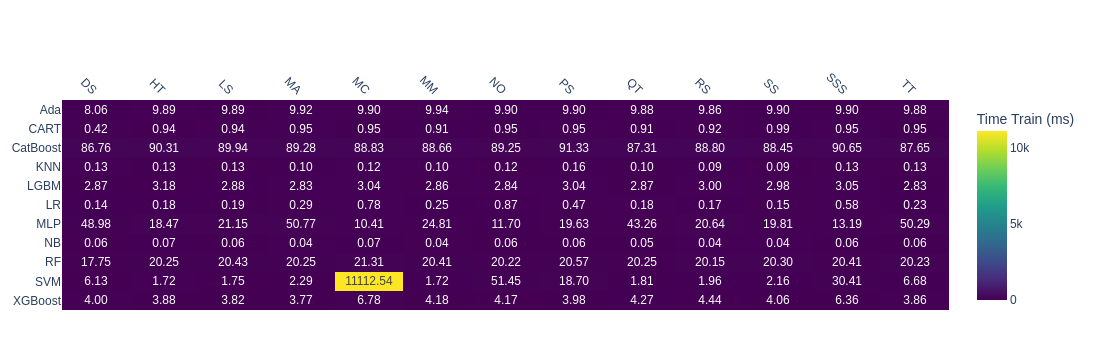

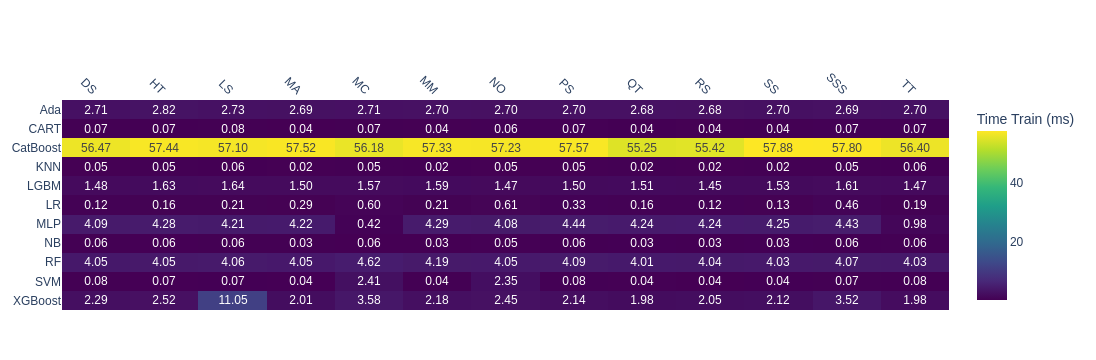

In [16]:
import plotly.express as px

df_class_analysis = df_classification['dataset_name'].unique()

for dataset in df_class_analysis:
    df_filtered_class = df_classification[df_classification['dataset_name'] == dataset]

    # Pivot to create a matrix: rows = models, columns = scalers, values = mean accuracy
    heat_df = df_filtered_class.groupby(['model', 'scaling_abbrev'])['time_train'].mean().unstack()*100

    fig = px.imshow(heat_df,
                    text_auto=".2f",
                    aspect="auto",
                    labels=dict(x="", y="", color="Time Train (ms)"),
                    color_continuous_scale='Viridis',
                    title=f'')

    # Accuracy Heatmap per Scaler and Model - {dataset}
    fig.update_xaxes(side="top", tickangle=45)
    fig.update_layout(margin=dict(t=100, l=50, r=50, b=50))
    fig.show()


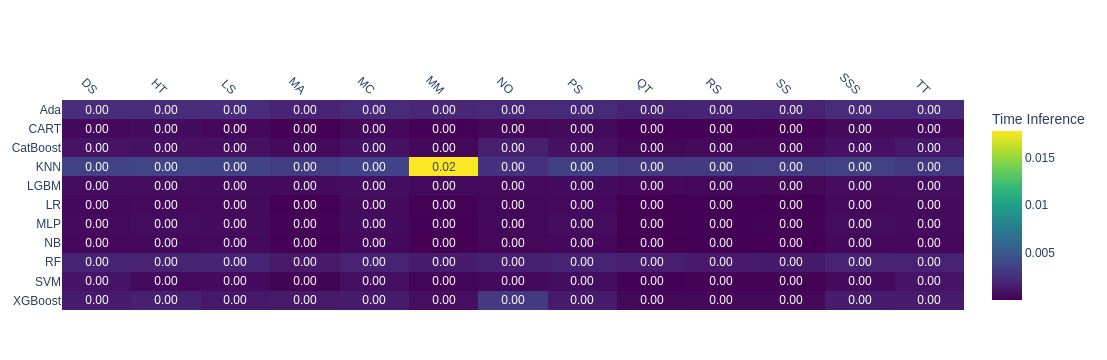

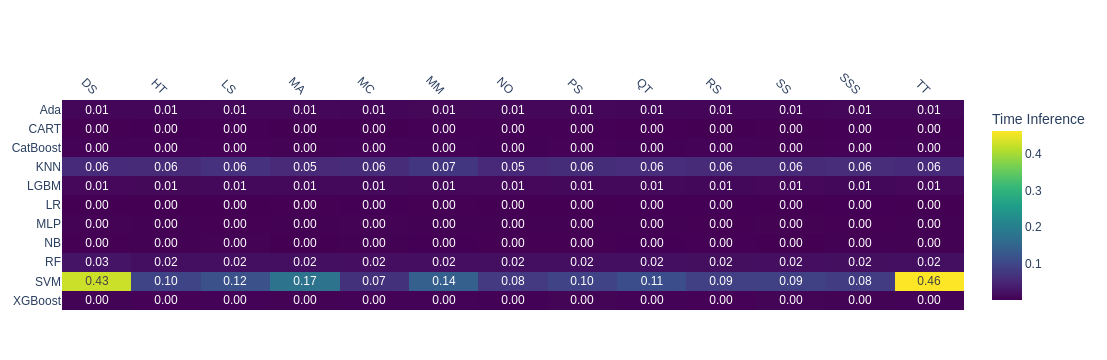

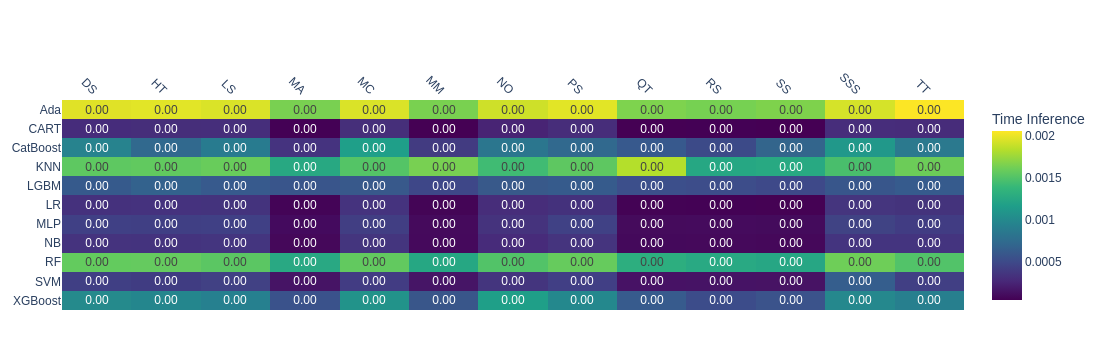

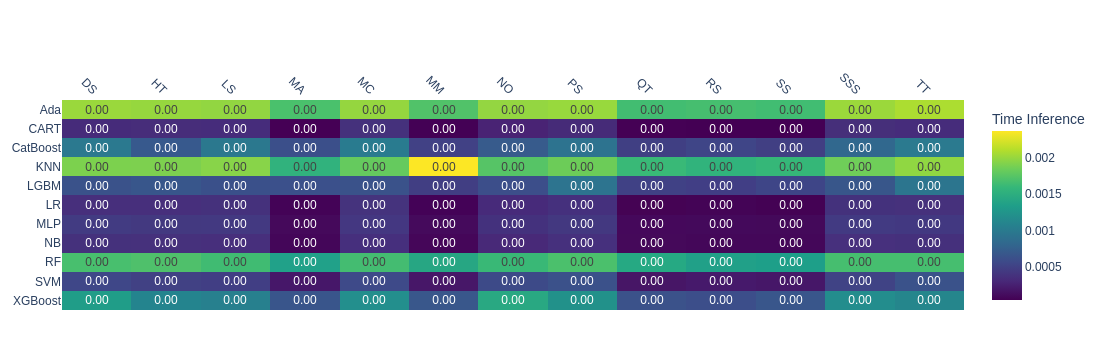

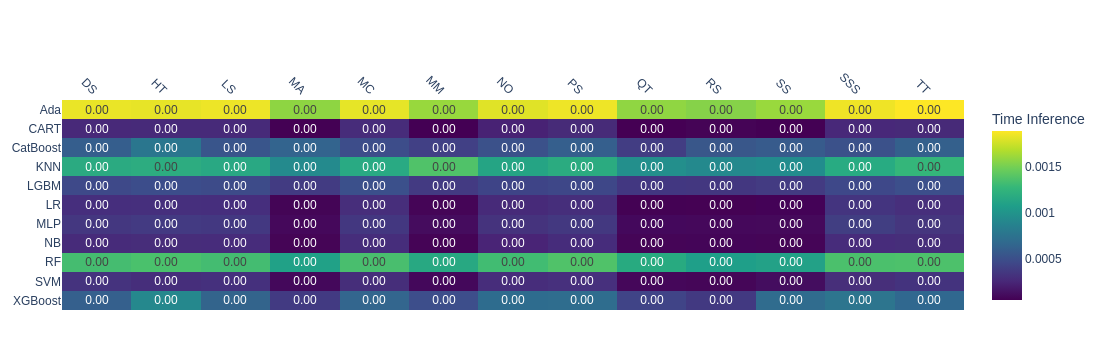

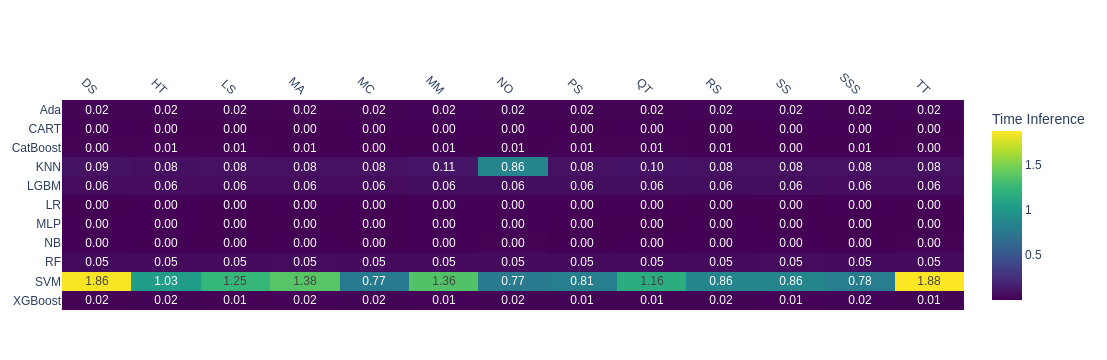

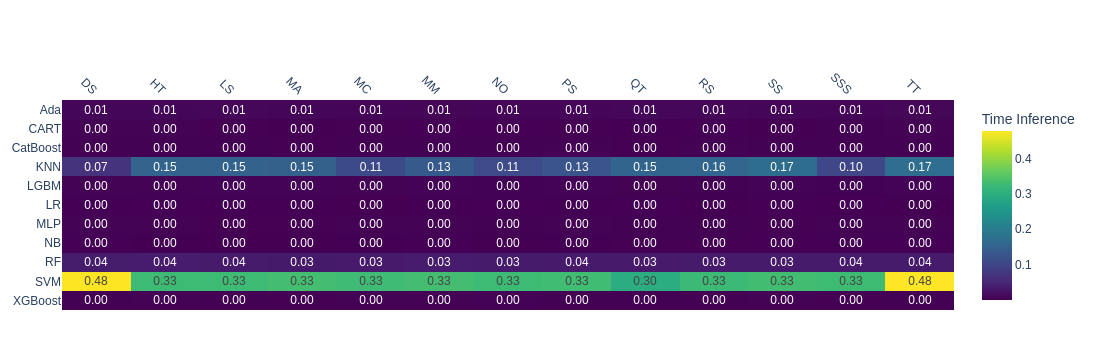

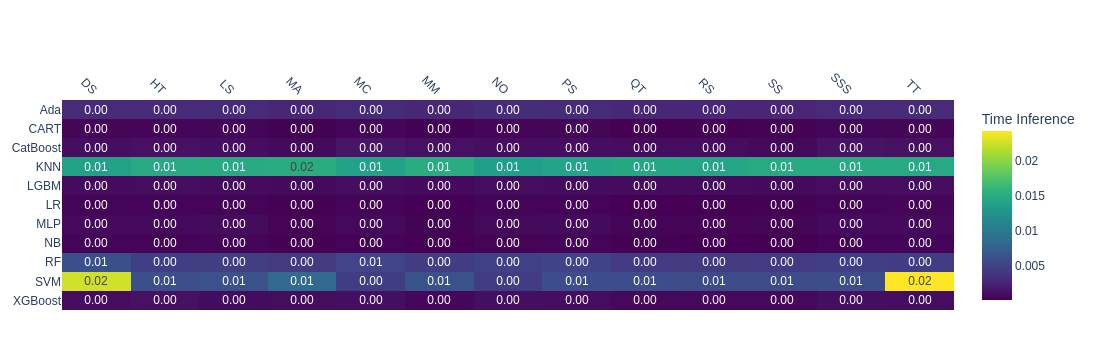

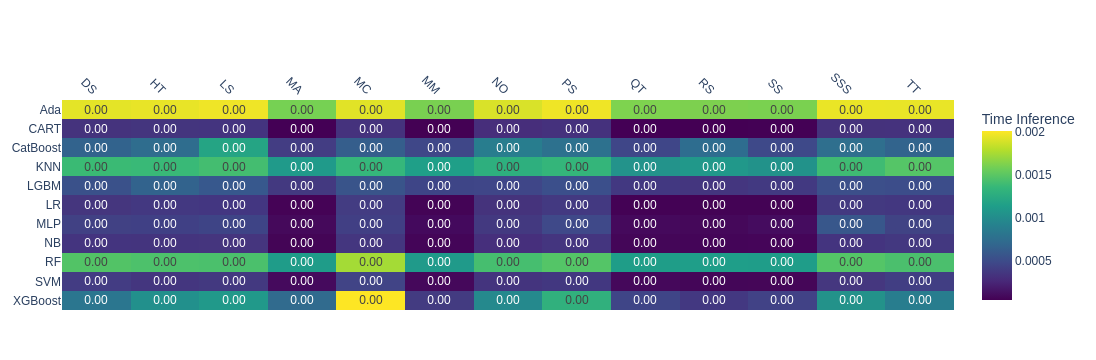

In [14]:
import plotly.express as px

df_class_analysis = df_classification['dataset_name'].unique()

for dataset in df_class_analysis:
    df_filtered_class = df_classification[df_classification['dataset_name'] == dataset]

    # Pivot to create a matrix: rows = models, columns = scalers, values = mean accuracy
    heat_df = df_filtered_class.groupby(['model', 'scaling_abbrev'])['time_inference'].mean().unstack()

    fig = px.imshow(heat_df,
                    text_auto=".2f",
                    aspect="auto",
                    labels=dict(x="", y="", color="Time Inference"),
                    color_continuous_scale='Viridis',
                    title=f'')

    # Accuracy Heatmap per Scaler and Model - {dataset}
    fig.update_xaxes(side="top", tickangle=45)
    fig.update_layout(margin=dict(t=100, l=50, r=50, b=50))
    fig.show()


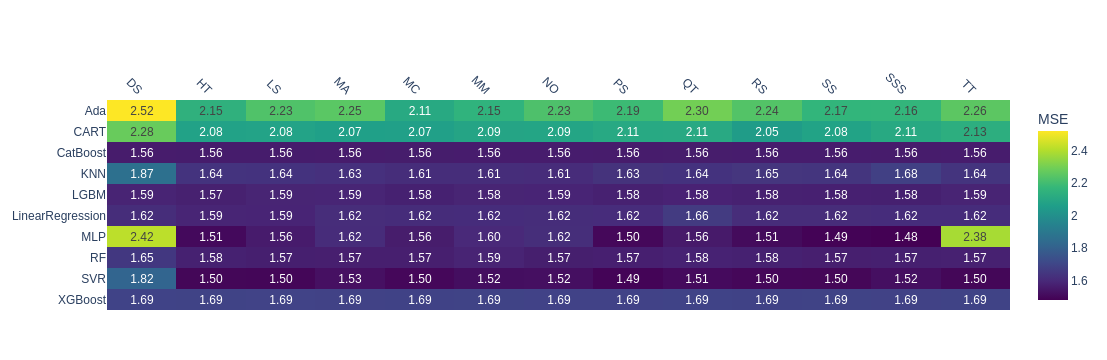

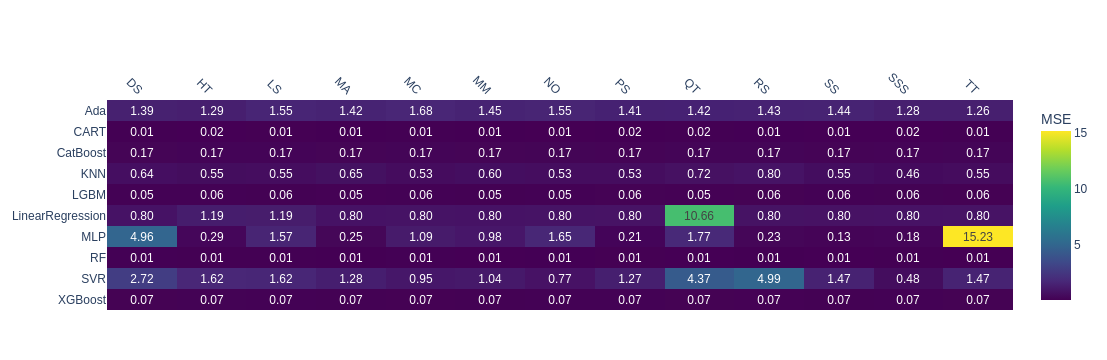

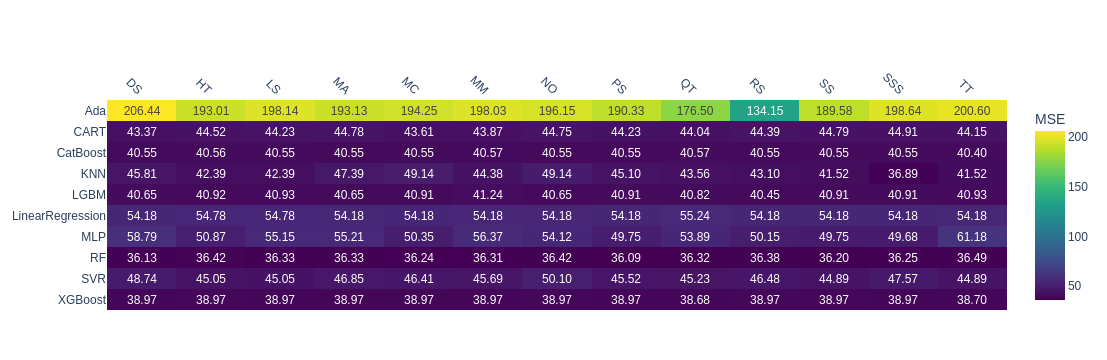

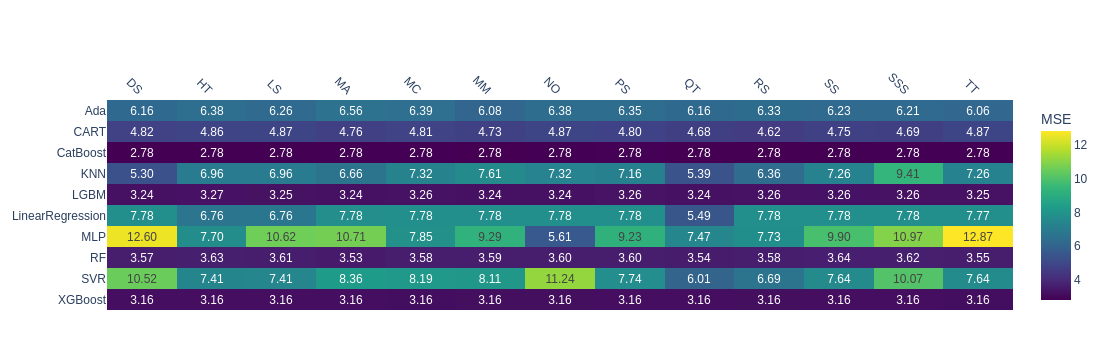

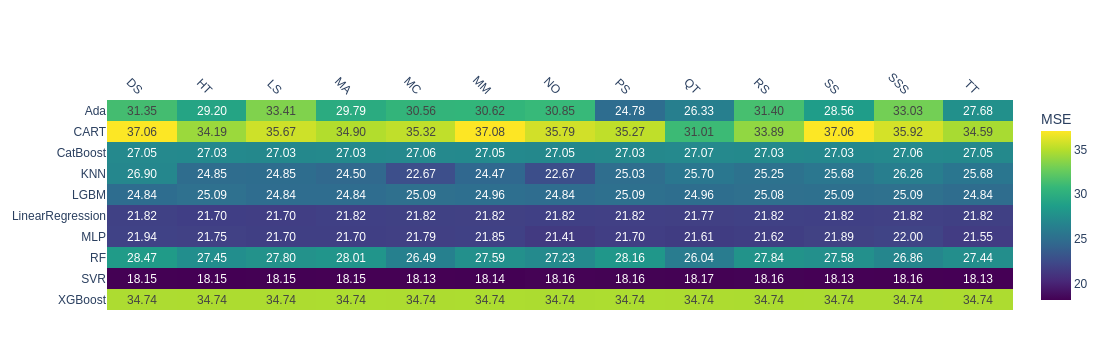

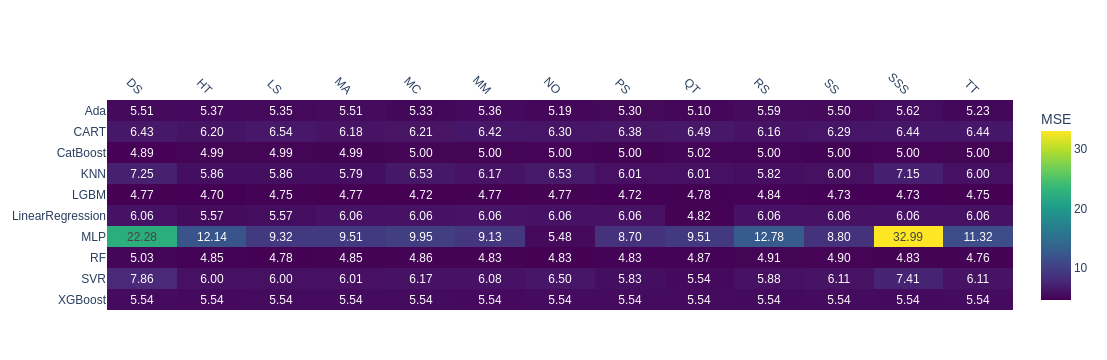

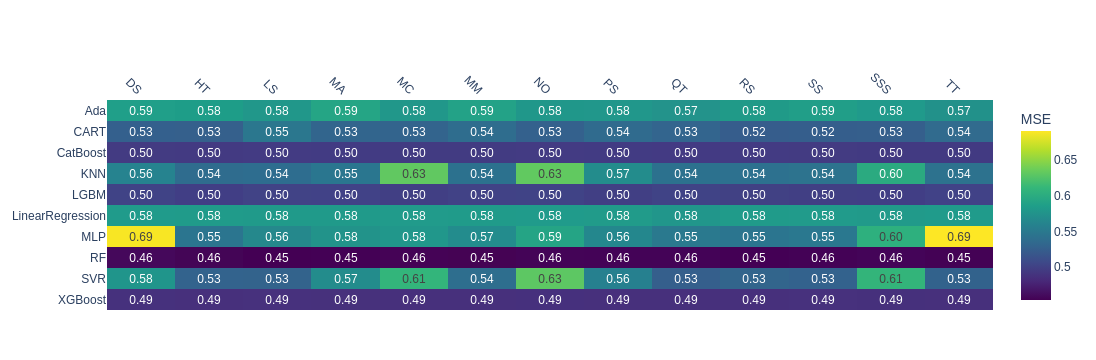

In [11]:
import plotly.express as px

df_reg_analysis = df_regression['dataset_name'].unique()

for dataset in df_reg_analysis:
    df_filtered_reg = df_regression[df_regression['dataset_name'] == dataset]

    # Pivot to create a matrix: rows = models, columns = scalers, values = mean accuracy
    heat_df = df_filtered_reg.groupby(['model', 'scaling_abbrev'])['mae'].mean().unstack()

    fig = px.imshow(heat_df,
                    text_auto=".2f",
                    aspect="auto",
                    labels=dict(x="", y="", color="MSE"),
                    color_continuous_scale='Viridis',
                    title=f'')

    # Accuracy Heatmap per Scaler and Model - {dataset}
    fig.update_xaxes(side="top", tickangle=45)
    fig.update_layout(margin=dict(t=100, l=50, r=50, b=50))
    fig.show()


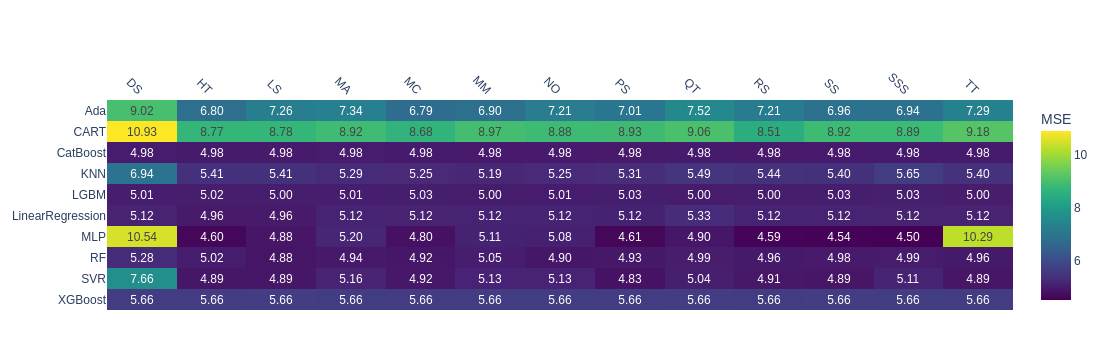

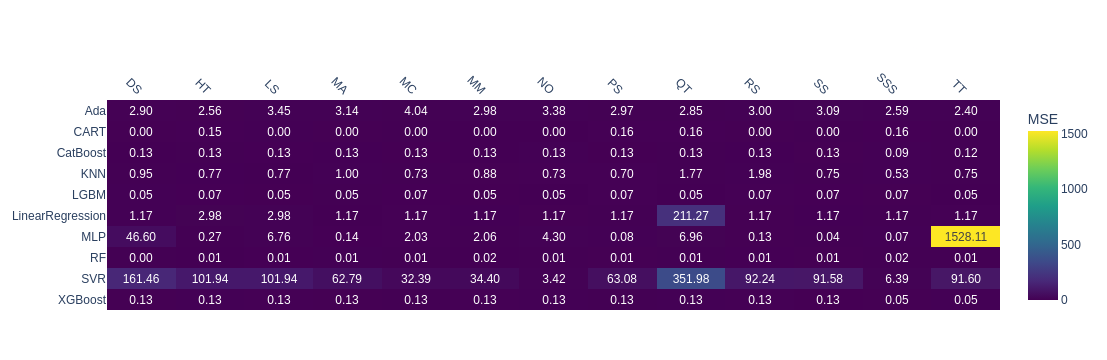

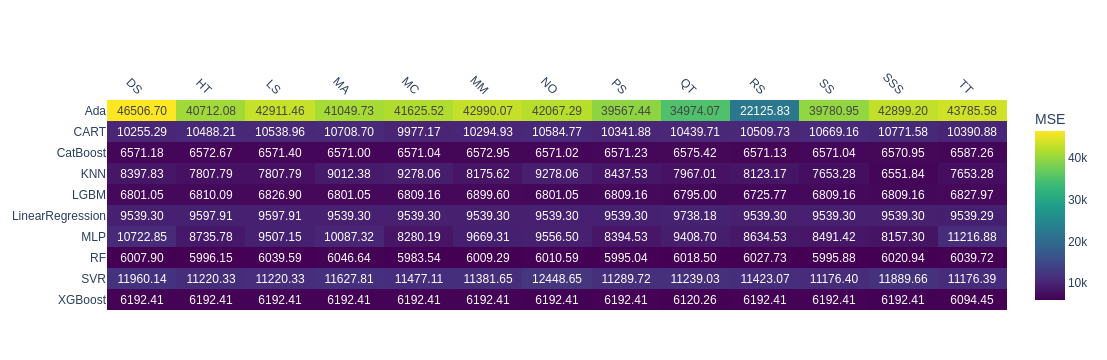

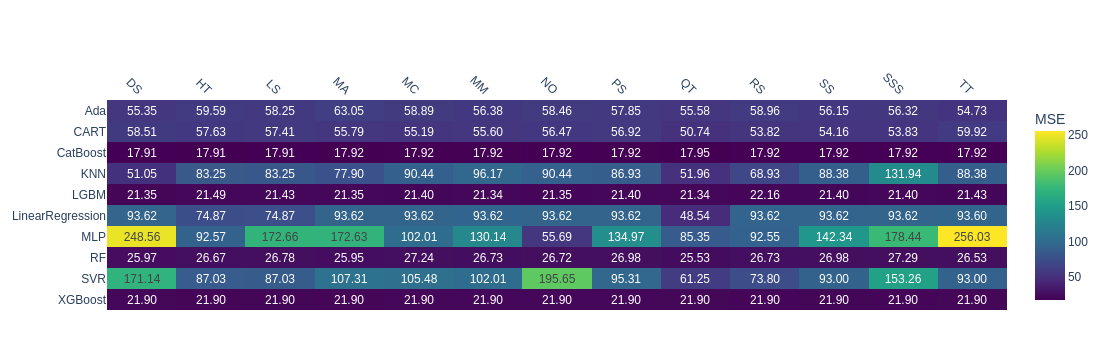

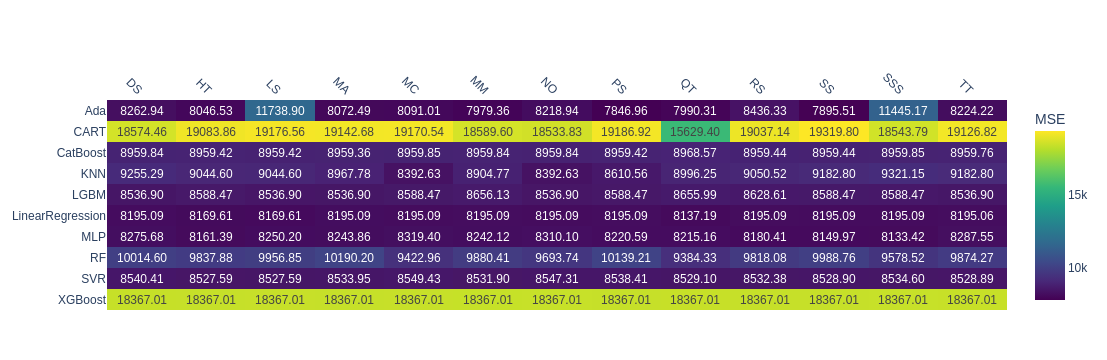

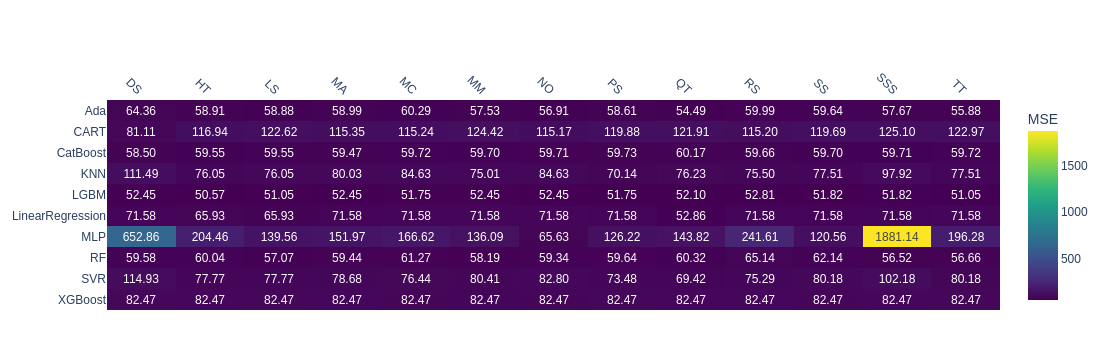

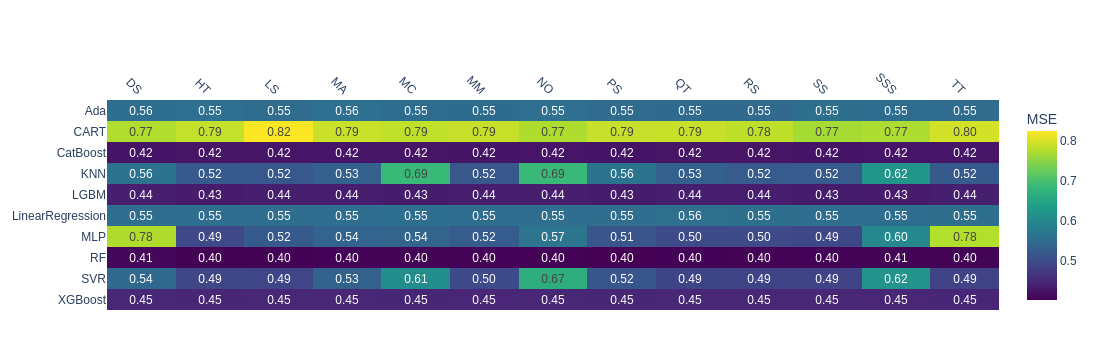

In [10]:
import plotly.express as px

df_reg_analysis = df_regression['dataset_name'].unique()

for dataset in df_reg_analysis:
    df_filtered_reg = df_regression[df_regression['dataset_name'] == dataset]

    # Pivot to create a matrix: rows = models, columns = scalers, values = mean accuracy
    heat_df = df_filtered_reg.groupby(['model', 'scaling_abbrev'])['mse'].mean().unstack()

    fig = px.imshow(heat_df,
                    text_auto=".2f",
                    aspect="auto",
                    labels=dict(x="", y="", color="MSE"),
                    color_continuous_scale='Viridis',
                    title=f'')

    # Accuracy Heatmap per Scaler and Model - {dataset}
    fig.update_xaxes(side="top", tickangle=45)
    fig.update_layout(margin=dict(t=100, l=50, r=50, b=50))
    fig.show()
